In [18]:

get_sum(t_pattern,t_rule)

NameError: name 'get_sum' is not defined

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['w','b','r'])


In [2]:
r=1
k=3
init_rule = np.zeros((1+2*r)**k,dtype=int)

In [3]:
init_pattern = np.zeros(20,dtype=int)
init_pattern[int(len(init_pattern)/2)]=int(k/2)
target_lifetime = 40

In [4]:
def update_pattern(pattern,rule,r=1,k=3):
    sum = 0
    for i in range(1+2*r):
        if i != 2*r:
            lim= -2*r+i
        else:
            lim=len(pattern)
        sum += k**i * pattern[i:lim]
    return rule[sum]

In [5]:
def check_width_and_update(outputs):
    
    lst_out = list(outputs[-1])
    lst_out = [0]+lst_out+[0]
    outputs[-1] = np.array(lst_out)
    
    if lst_out[1]!=0:
        outputs = [np.array([0]+list(output)) for output in outputs]
    elif lst_out[-2]!=0:
        outputs = [np.array(list(output)+[0]) for output in outputs]
    return outputs

In [6]:
def simulate(input_pattern,rule):
    pattern = input_pattern.copy()
    output = [pattern.copy()]
    lifetime = 1
    while sum(pattern)>0 and lifetime < 80:
        pattern = update_pattern(output[-1],rule)
        lifetime+=1
        output.append(pattern.copy())
        output = check_width_and_update(output)

    return lifetime, output

In [7]:
def evolve_rule(rule,n_muts = 1):
    output = rule.copy()
    ix = 0
    for _ in range(n_muts):
        while ix == 0:
            ix = np.random.choice((1+2*r)**k)
        val = np.random.choice(k)
        output[ix] = val
    output[0] = 0
    return output

In [8]:
def compute_score(lifetime,target_lifetime):
    return abs(lifetime-target_lifetime)

In [9]:
def train(init_pattern,init_rule):
    best_score = compute_score(1,target_lifetime)
    round = 0
    rule = init_rule.copy()
    evolve_rounds = [0]
    retained_rules = [rule]
    
    while best_score > 0 and round < 2500:
        candidate = evolve_rule(rule)
        lifetime, _ = simulate(init_pattern,candidate)
        score = compute_score(lifetime,target_lifetime)
        round += 1
        if score <= best_score:
            if score != best_score:
                evolve_rounds.append(round)
                retained_rules.append(candidate)
            best_score = score
            rule = candidate
    print(f'Round : {round} best_score : {best_score}')

    if round == 2500:
        return False
    else:
        return retained_rules, evolve_rounds

In [10]:
ret = False
returns = []
while len(returns)<10:
    ret = train(init_pattern,init_rule)
    if ret:
        returns.append(ret)

Round : 2500 best_score : 15
Round : 2500 best_score : 15
Round : 2500 best_score : 12
Round : 2500 best_score : 34
Round : 662 best_score : 0
Round : 2500 best_score : 6
Round : 2500 best_score : 1
Round : 2500 best_score : 38
Round : 2500 best_score : 17
Round : 2500 best_score : 22
Round : 2500 best_score : 38
Round : 2500 best_score : 1
Round : 2500 best_score : 6
Round : 2500 best_score : 8
Round : 2500 best_score : 11
Round : 2500 best_score : 6
Round : 2500 best_score : 1
Round : 2500 best_score : 10
Round : 835 best_score : 0
Round : 2500 best_score : 1
Round : 2500 best_score : 1
Round : 2500 best_score : 22
Round : 2500 best_score : 11
Round : 2500 best_score : 8
Round : 2500 best_score : 1
Round : 2500 best_score : 8
Round : 2500 best_score : 16
Round : 898 best_score : 0
Round : 2500 best_score : 11
Round : 2500 best_score : 11
Round : 2500 best_score : 38
Round : 2500 best_score : 3
Round : 2500 best_score : 10
Round : 612 best_score : 0
Round : 2500 best_score : 6
Round :

In [11]:
retained_rules, evolve_rounds = returns[0]

In [12]:
def plot_rule(in_rule):
    print(in_rule)
    fig, axs = plt.subplots(nrows = 3, ncols = 9,figsize=(9,2),dpi=200)
    fig.subplots_adjust(wspace=0.1,hspace=0.1)
    for i in range(3):
        for j in range(3):
            for m in range(3):
                mat = np.zeros((2,3),dtype=int)
                mat[0,:] = [i,j,m]
                mat[1,1] = in_rule[sum([v * k**p for p,v in enumerate([i,j,m])])]
                ax = axs[i][m+ 3*j]
                ax.pcolormesh(mat,cmap=cmap,vmin=0,vmax=2, edgecolors='k', linewidth=1)
                ax.set_aspect('equal')
                ax.invert_yaxis() 
                #ax.grid(which='minor', color='r', linestyle='-', linewidth=2)
                #ax.set_axis_off()
                ax.set_xticks([]);ax.set_yticks([])

        

[0 2 0 2 0 2 0 2 1 2 0 1 0 2 1 0 0 2 0 0 2 2 1 0 1 1 0]


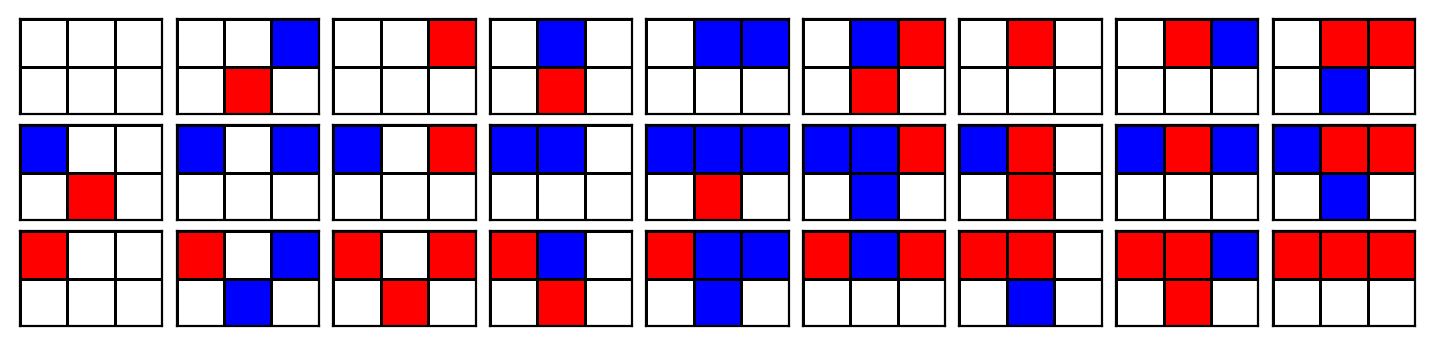

In [13]:
plot_rule(retained_rules[-1])

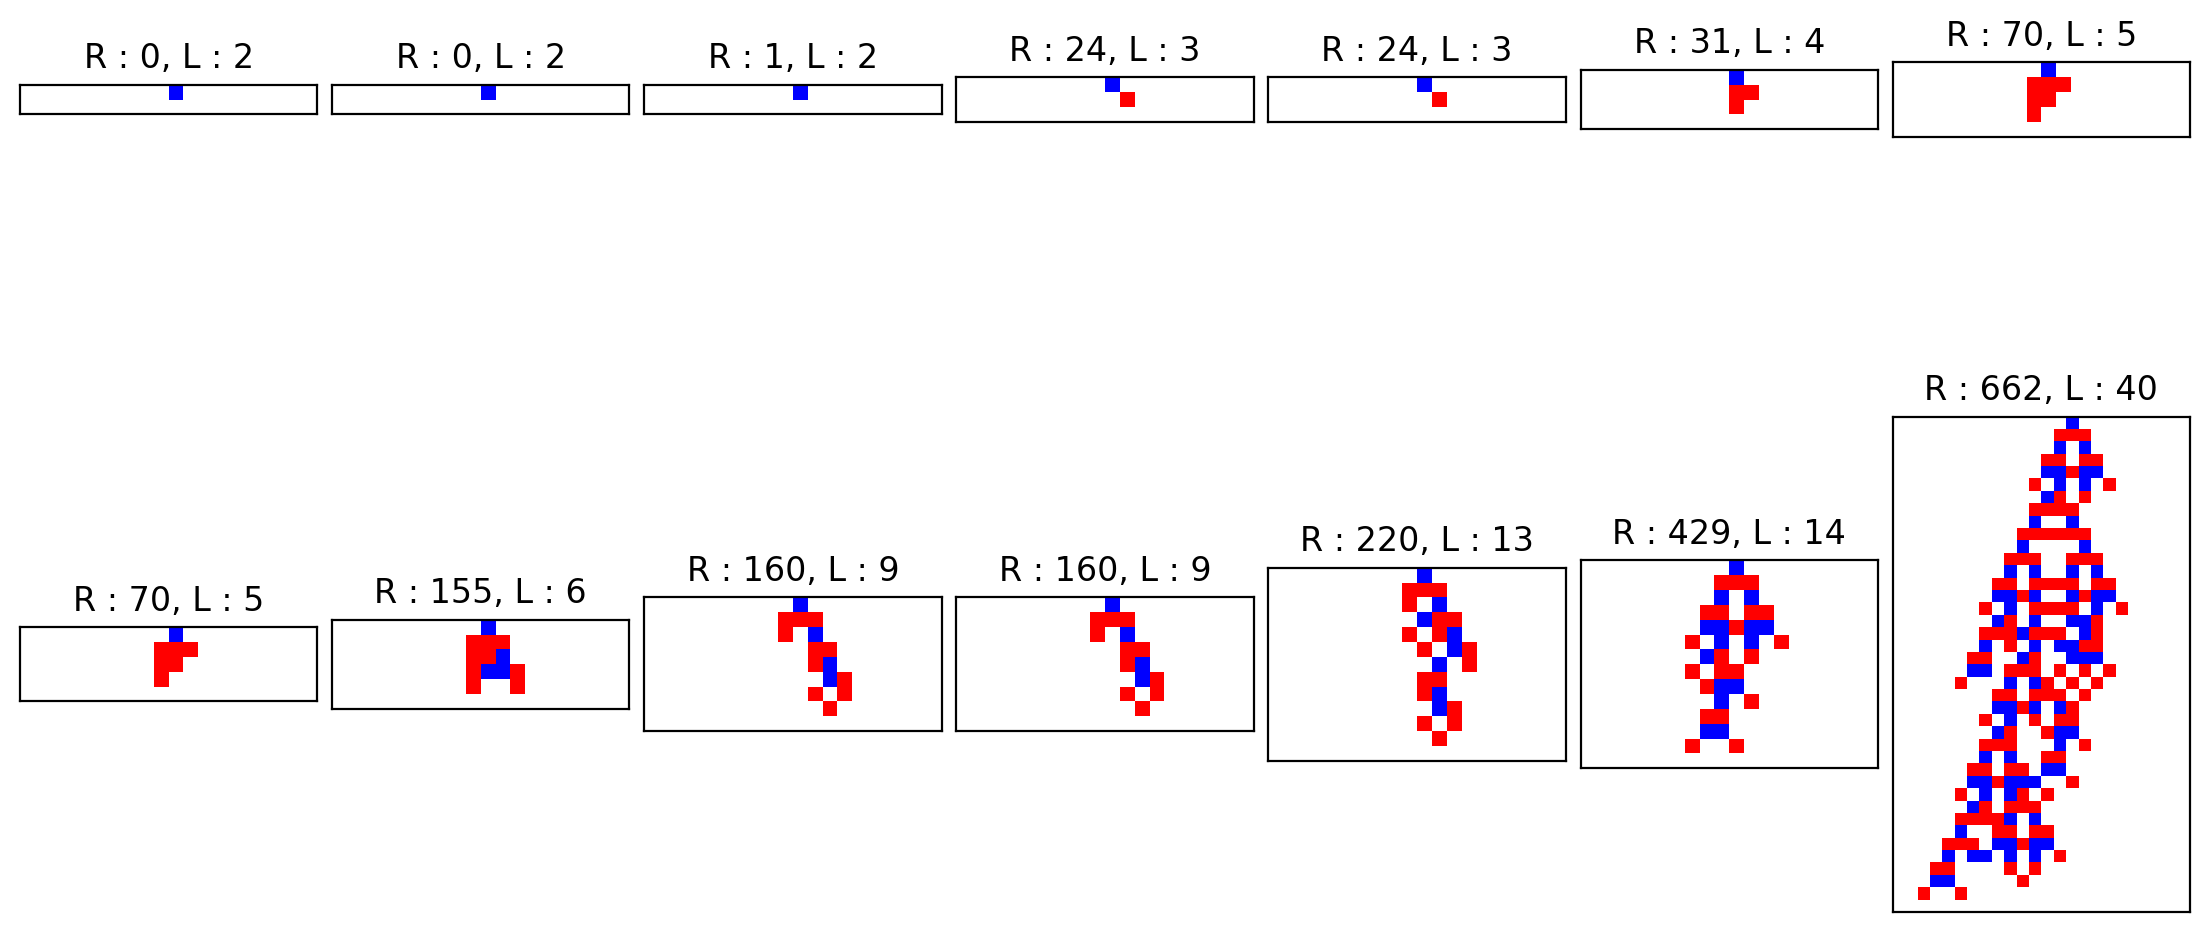

In [14]:

def plot_evolution(retained_rules,evolve_rounds):
    rules_ix = np.linspace(0,len(retained_rules)-1,14,dtype=int)
    fig, axs = plt.subplots(nrows=2,ncols=7,figsize=(14,7),dpi=200)
    fig.subplots_adjust(wspace=0.05,hspace=0.1)
    outputs = [simulate(init_pattern,retained_rules[ix])[1] for ix in rules_ix]
    
    max_lifetime = max([len(output) for output in outputs])
                       
    for i in range(2):
        for j in range(7):
            output = outputs[j+7*i]
            lifetime = len(output)
            #output += [np.zeros(len(output[-1]),dtype=int) for _ in range(max_lifetime-len(output))]
            ax = axs[i][j]
            #ax.matshow(np.array(output),cmap = cmap,vmin=0,vmax=2)
            ax.pcolormesh(np.array(output),cmap=cmap,vmin=0,vmax=2, edgecolors='k', linewidth=0, linestyle='dotted')
            ax.invert_yaxis() 
            ax.set_aspect('equal')
            ax.set_xticks([]);ax.set_yticks([])
            ax.set_title(f'R : {evolve_rounds[rules_ix[j+7*i]]}, L : {lifetime}')
            
plot_evolution(retained_rules,evolve_rounds)

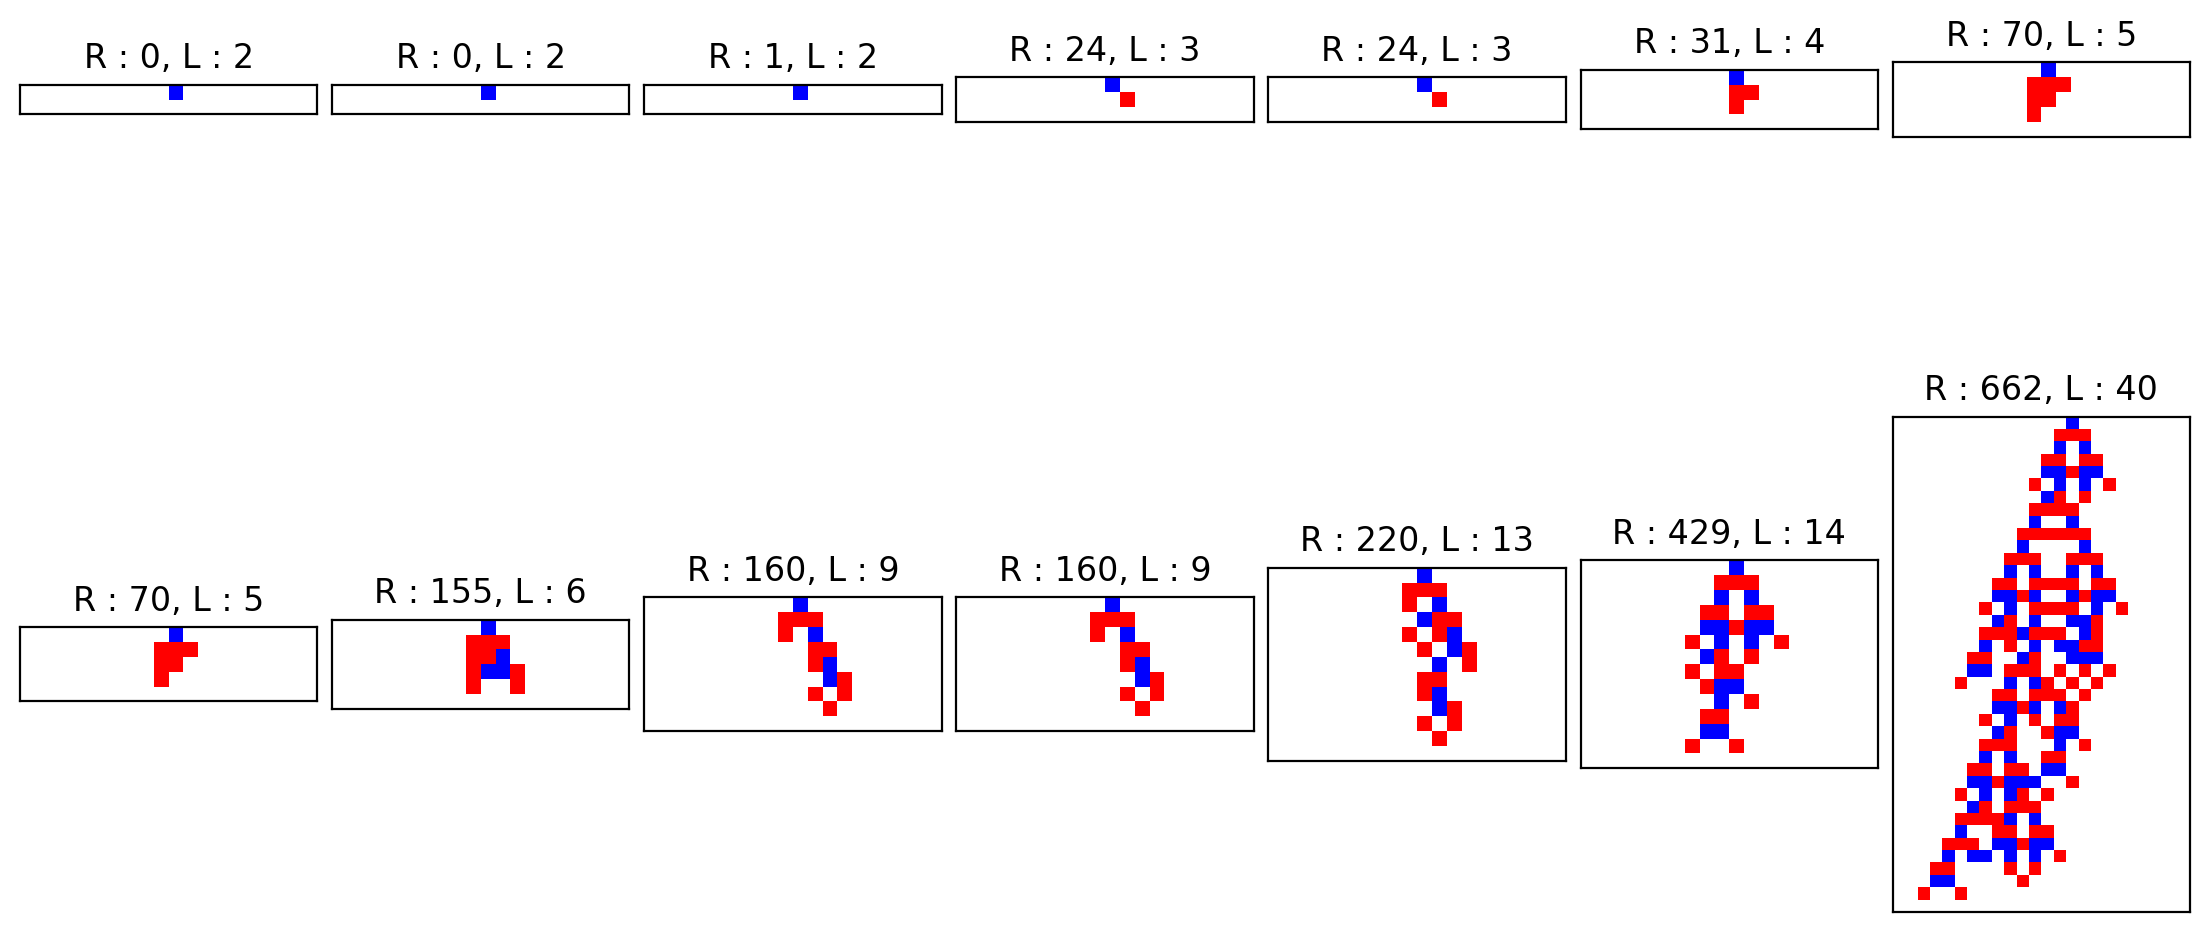

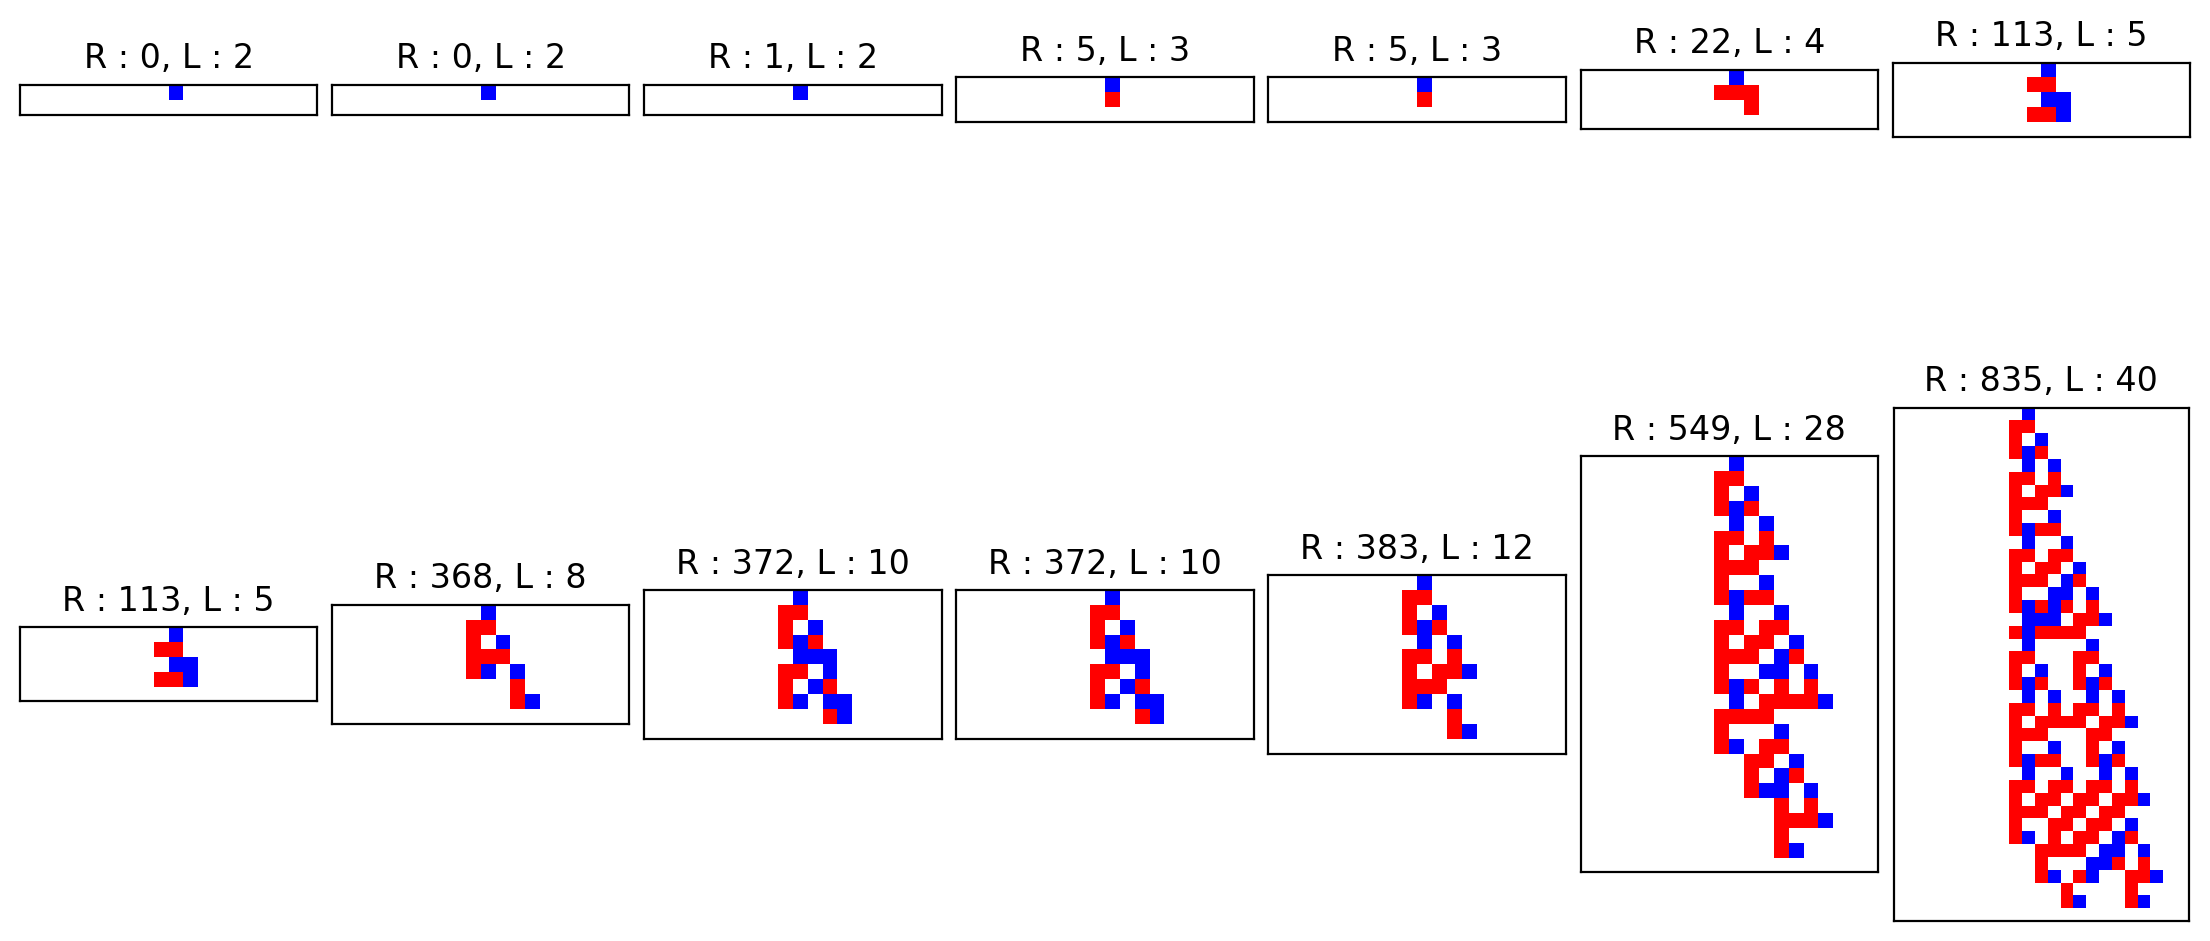

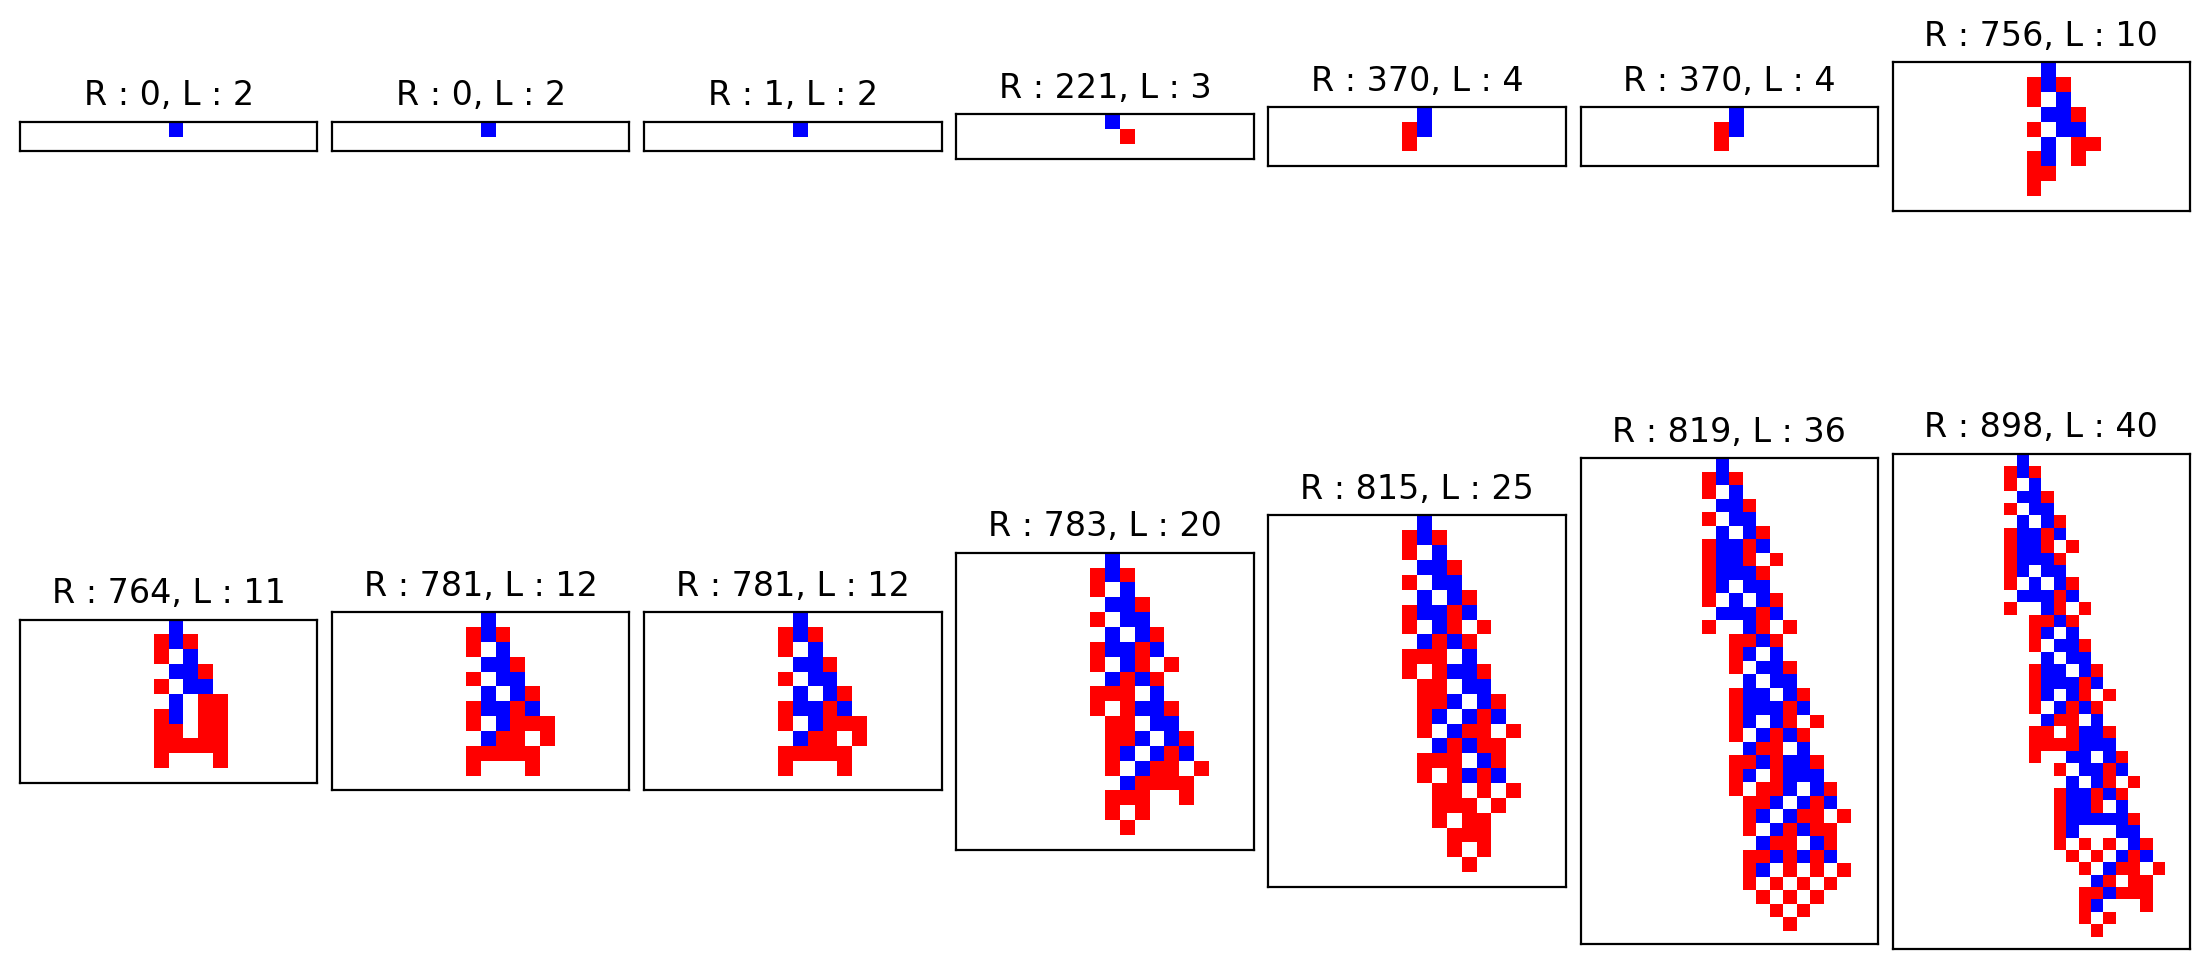

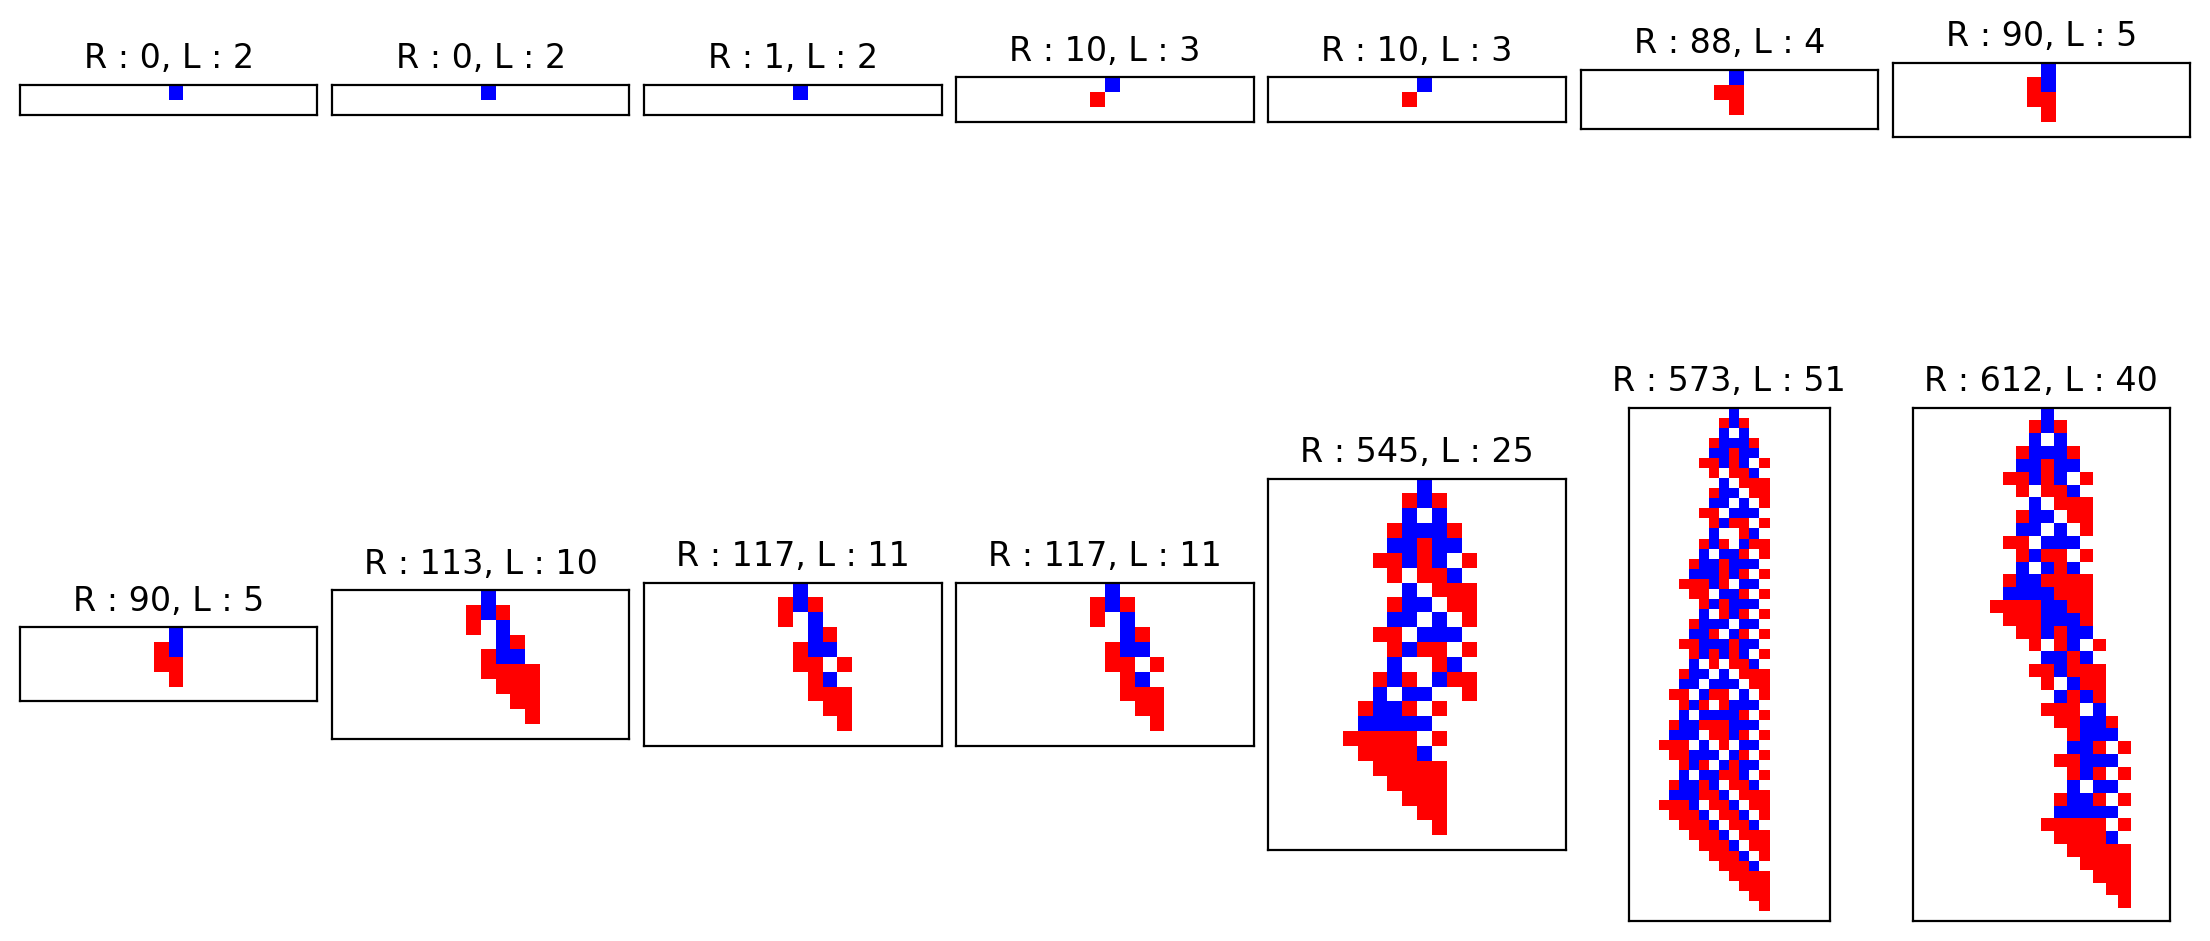

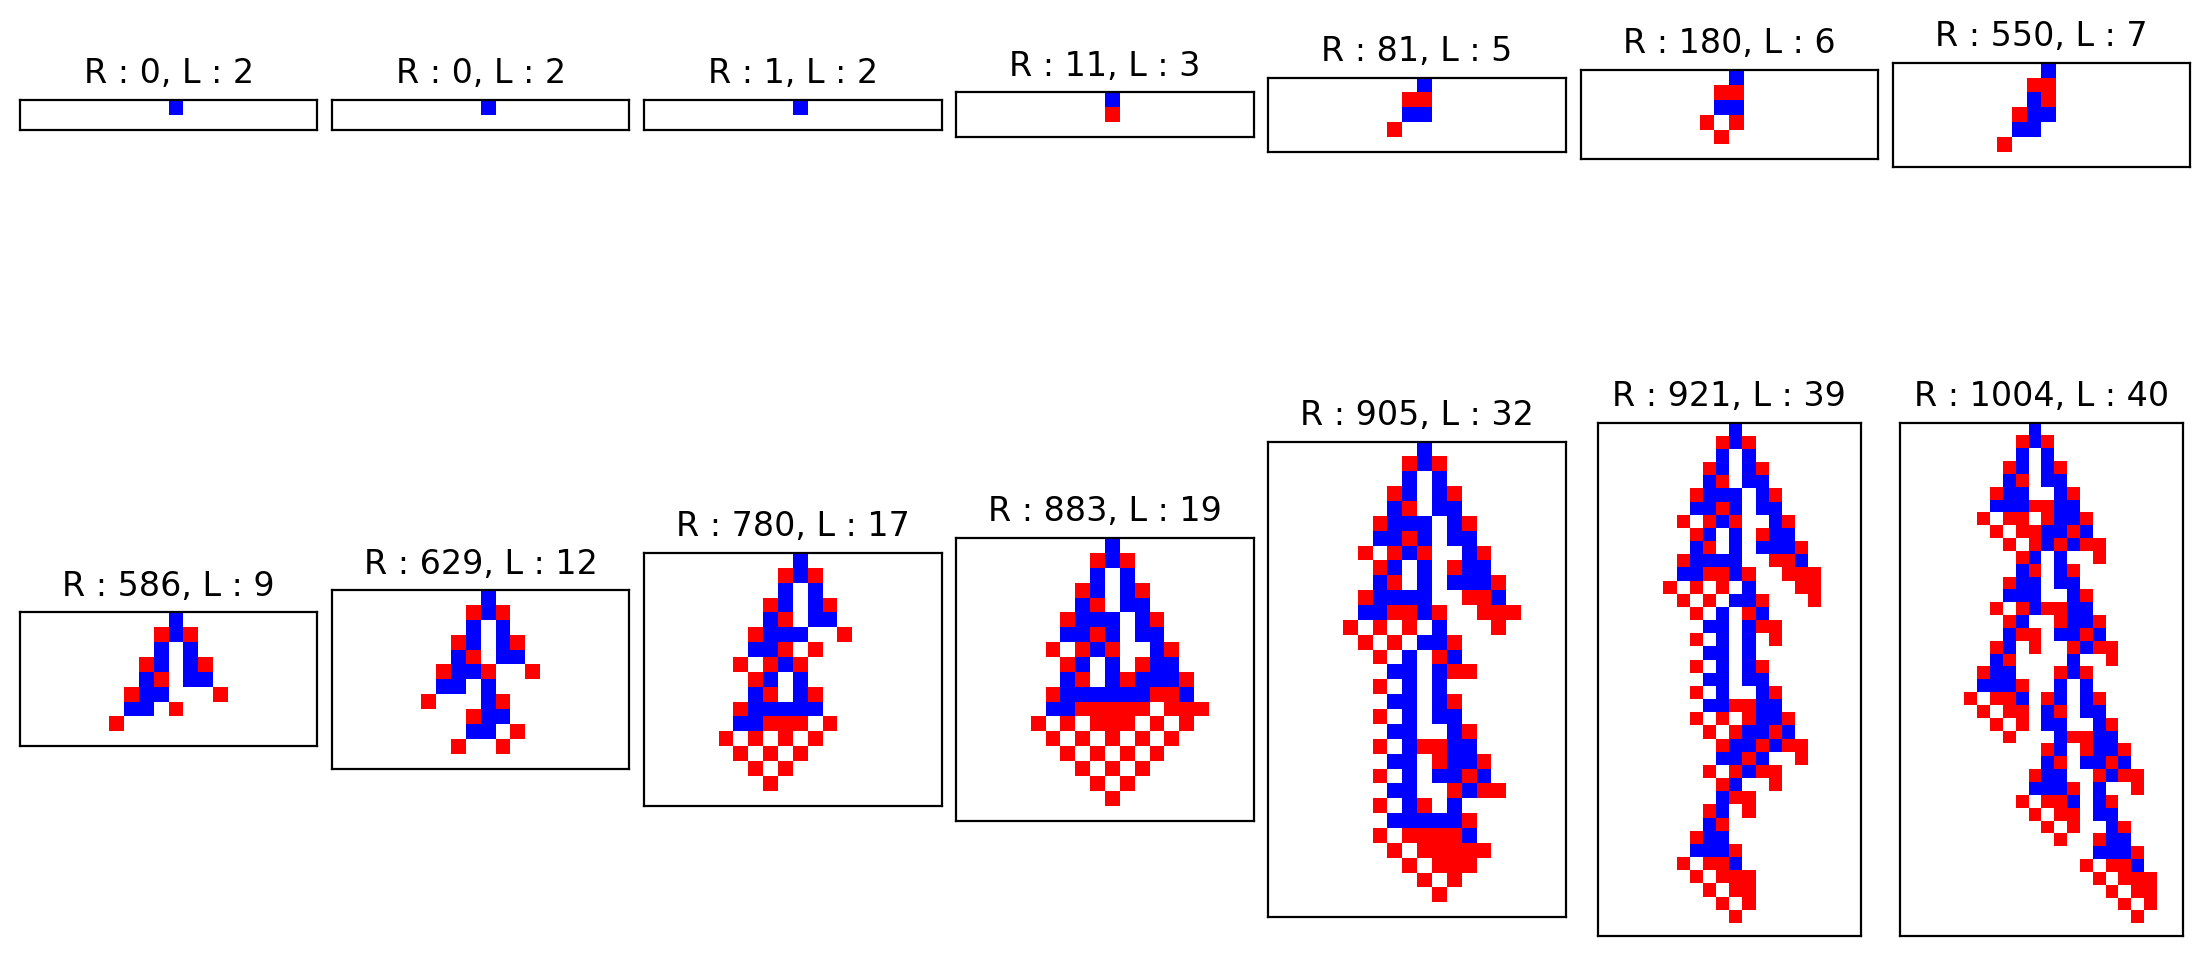

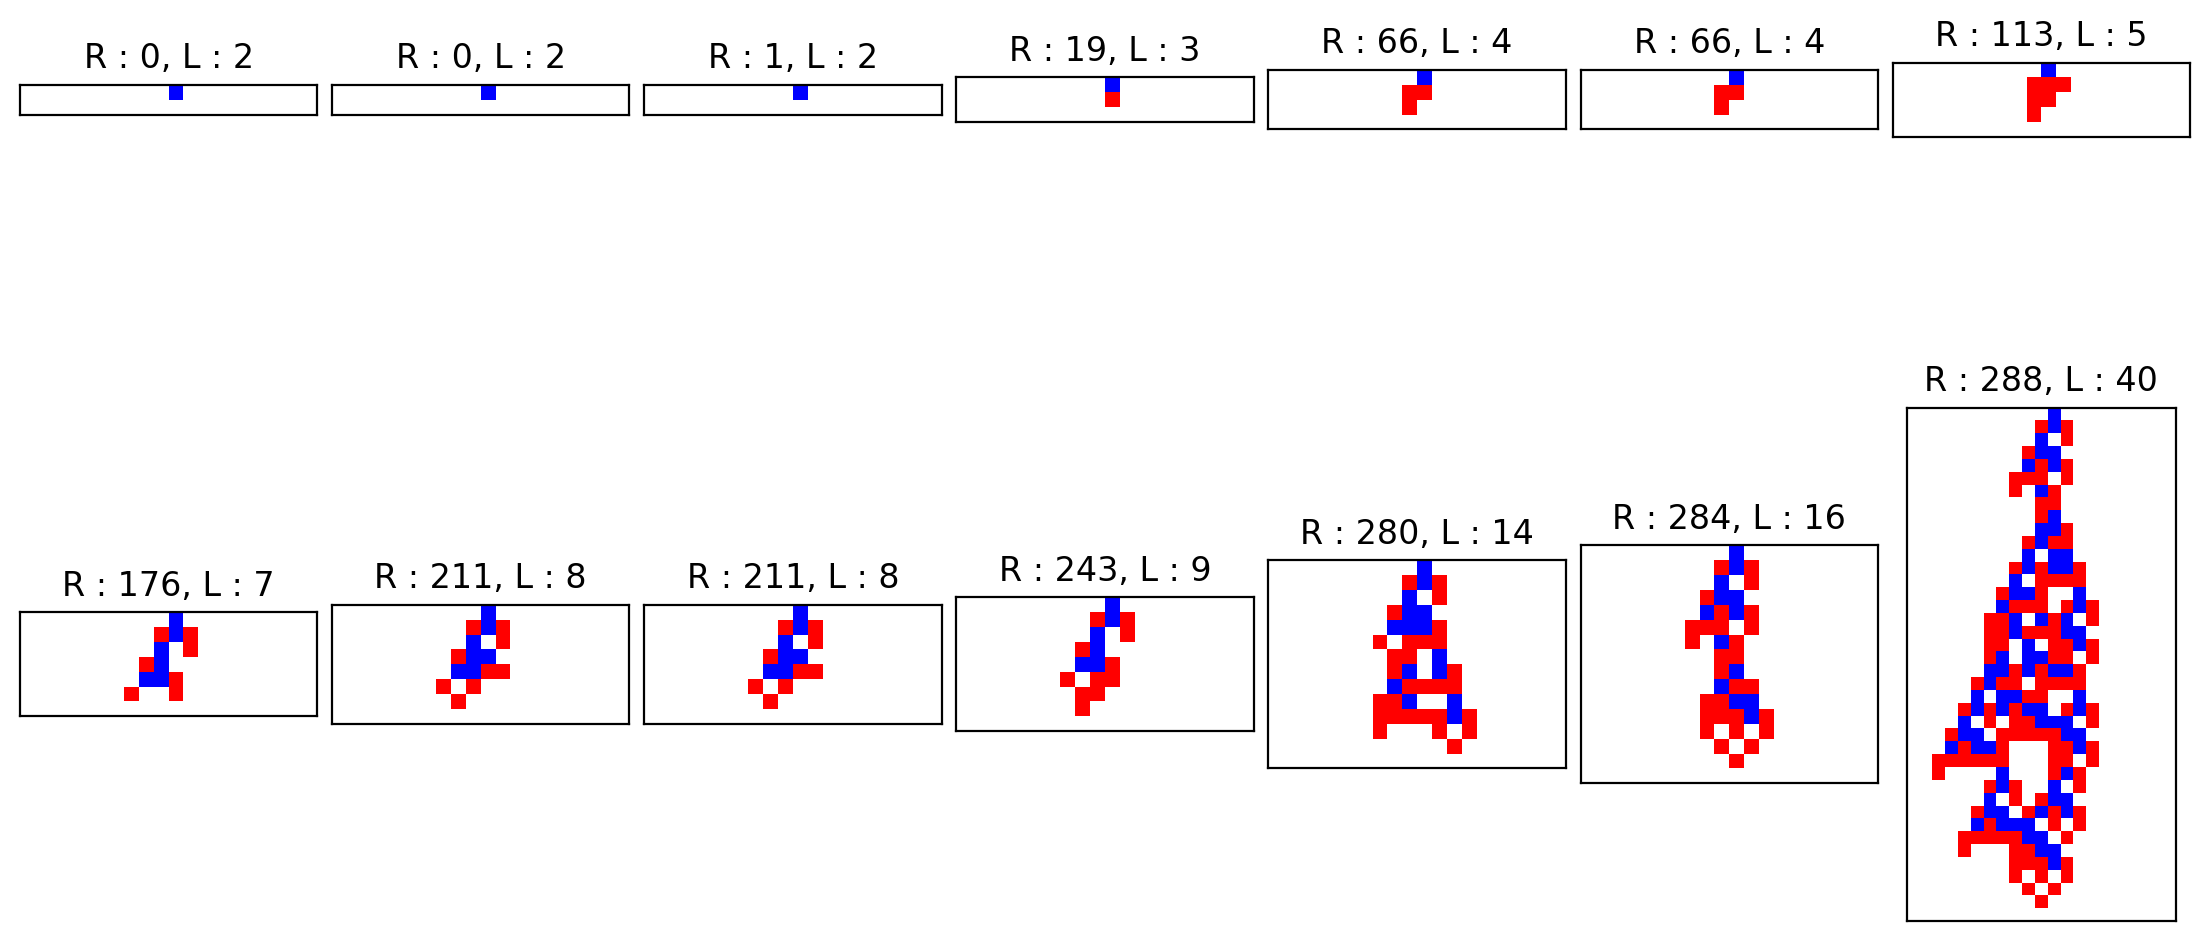

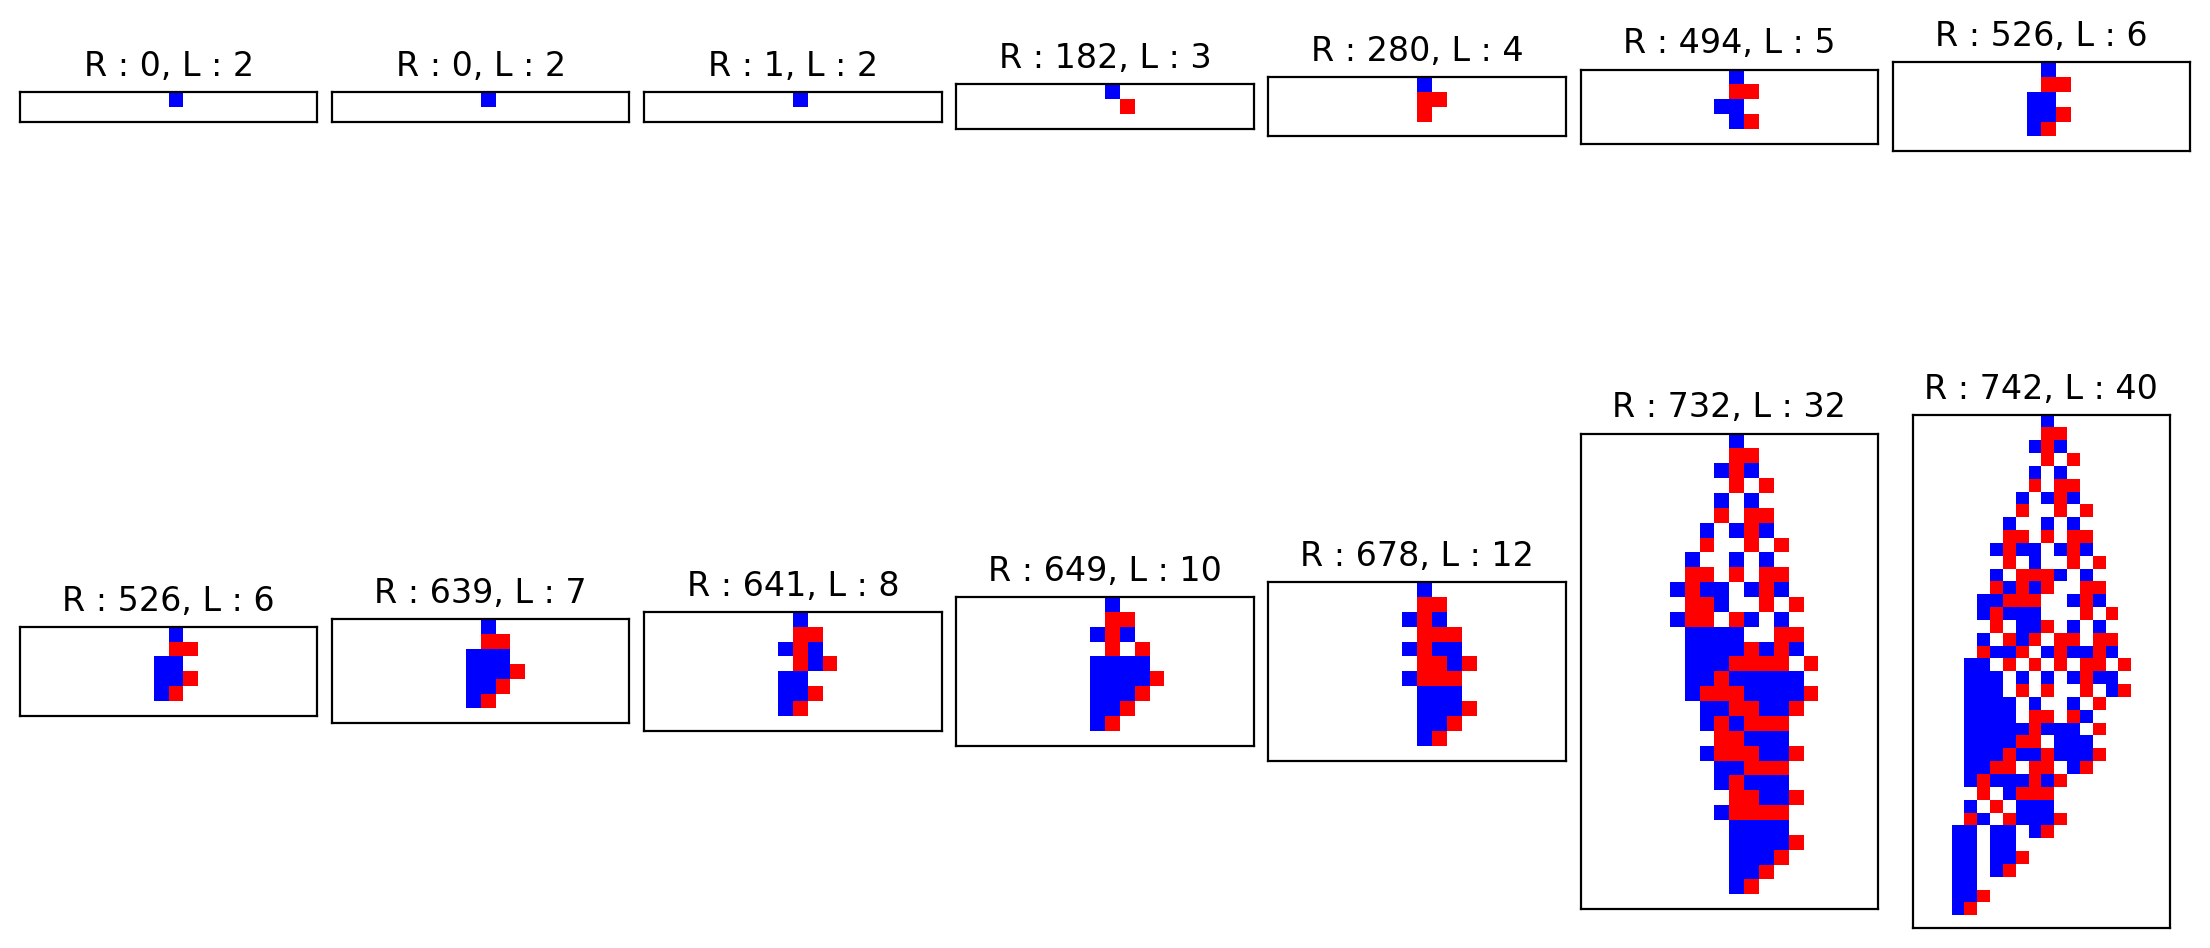

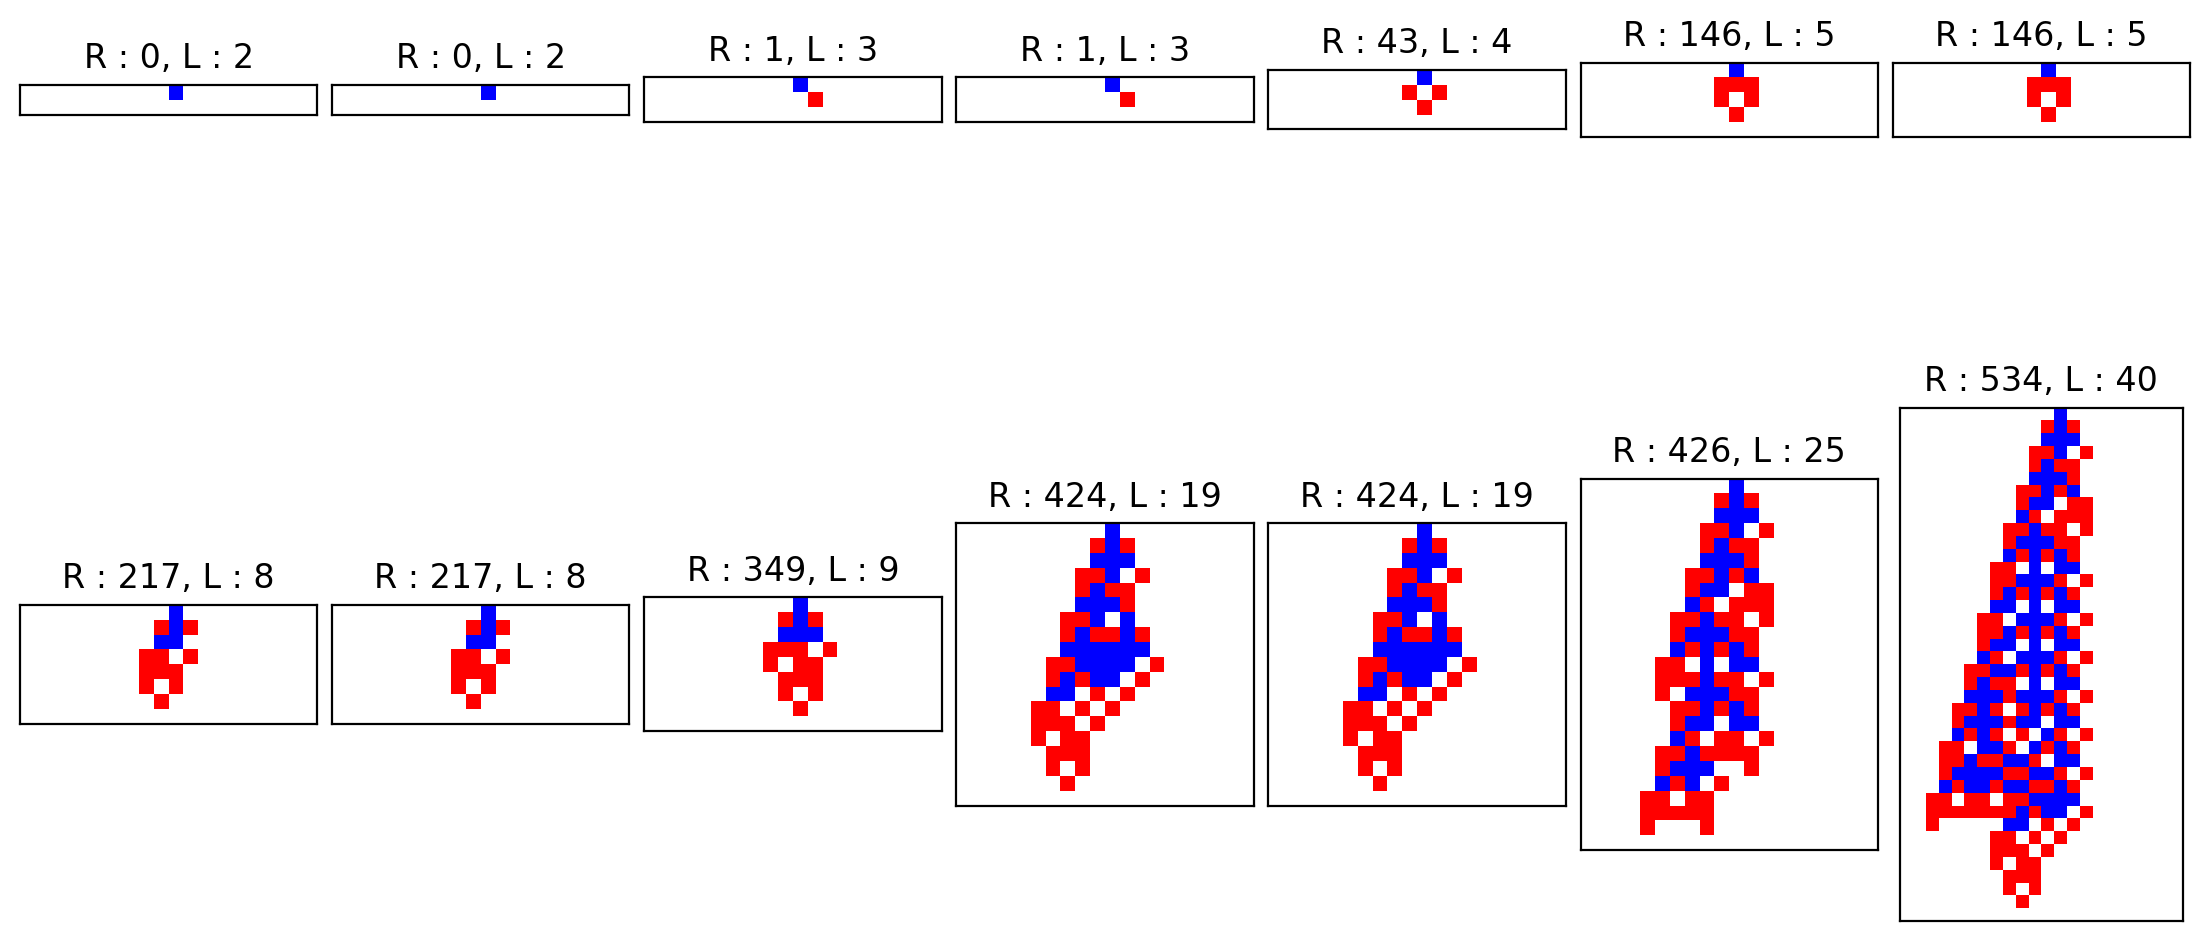

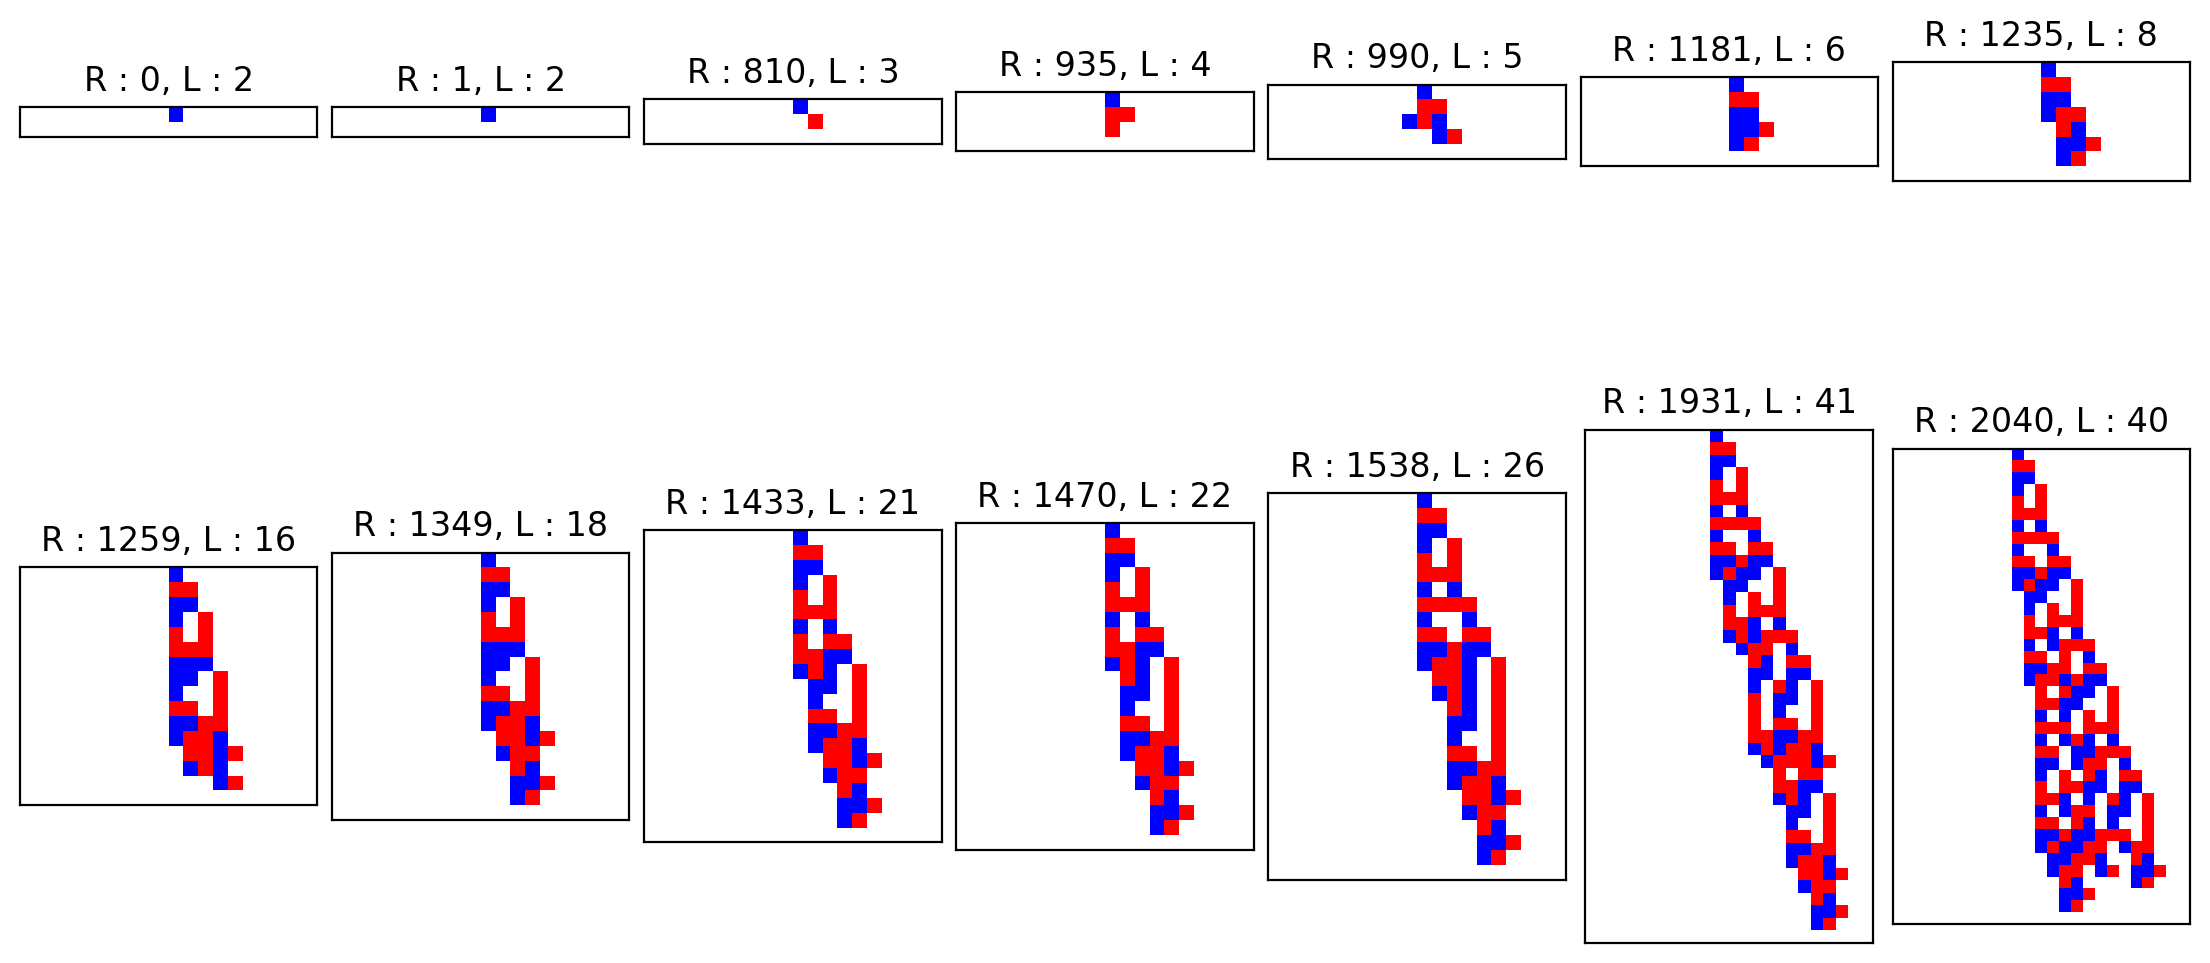

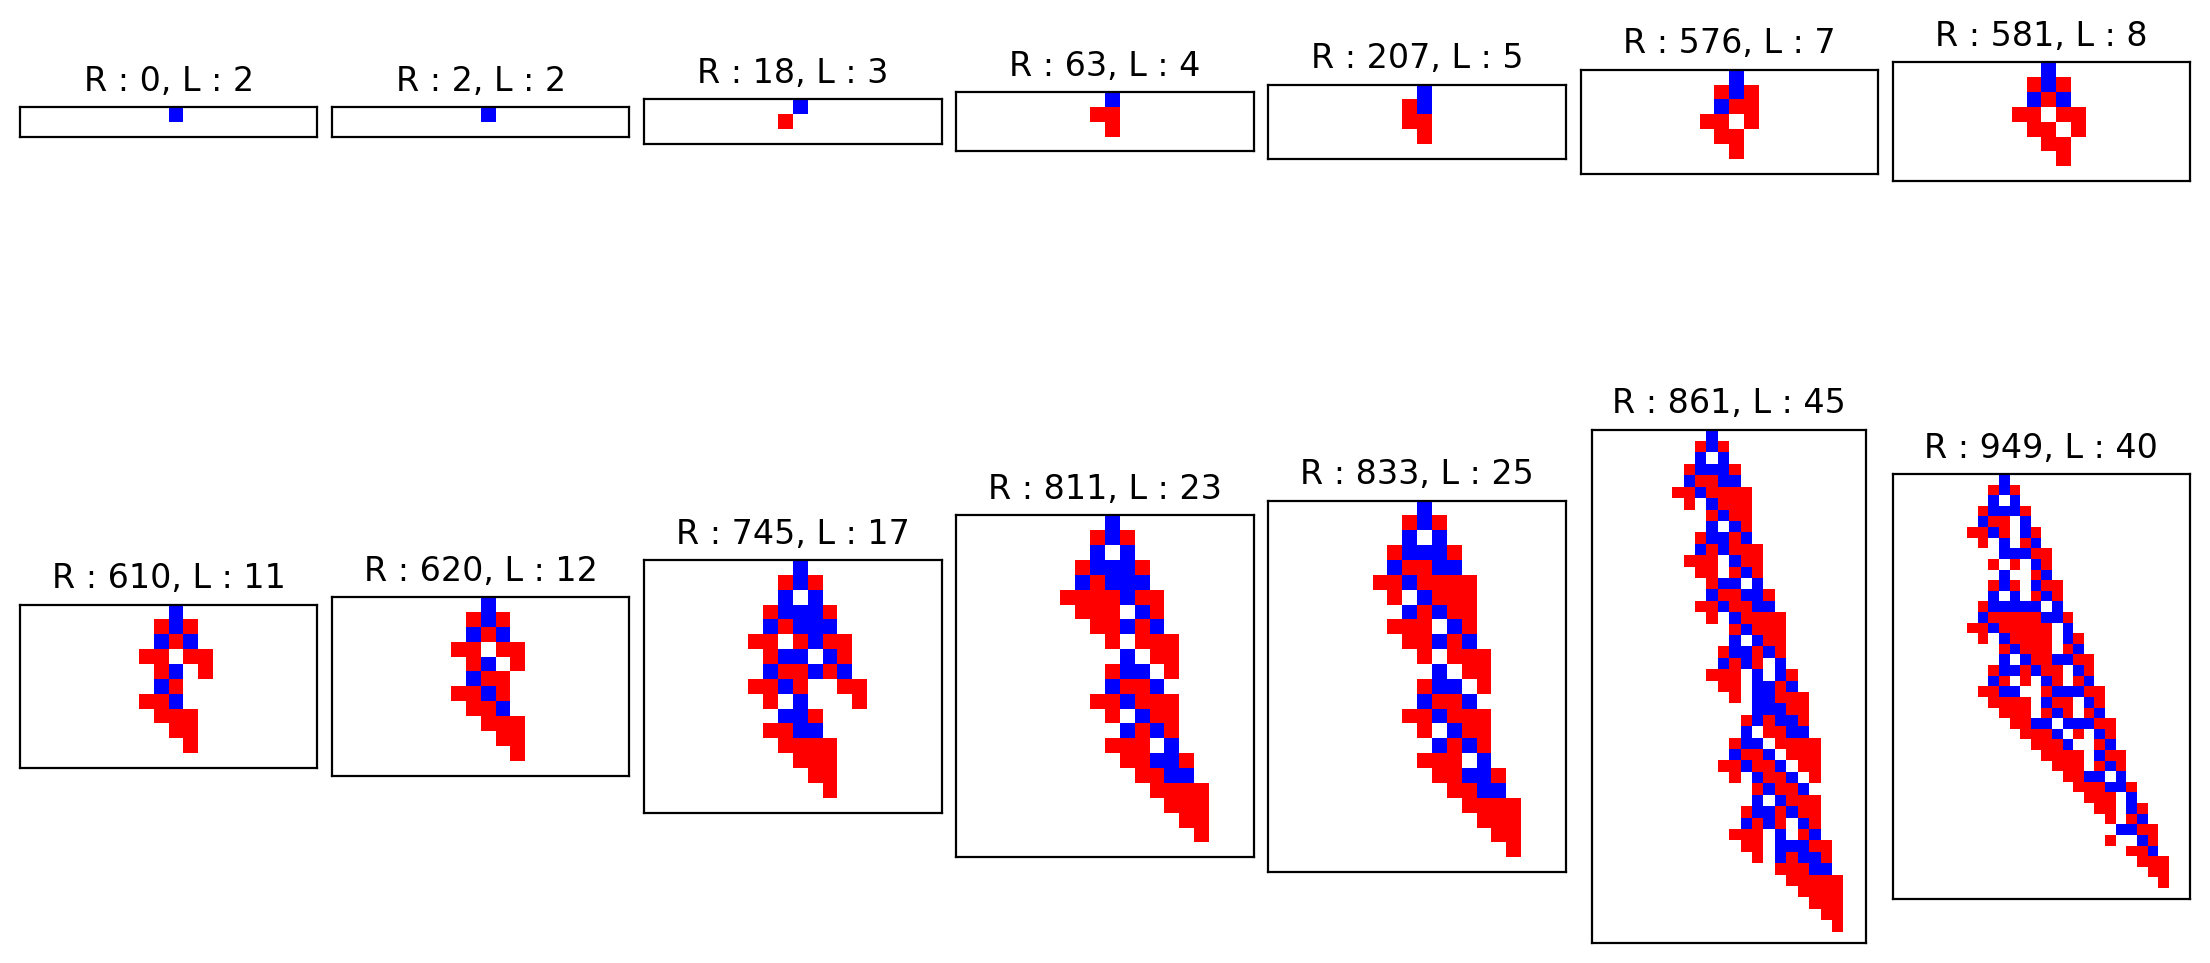

In [15]:
for ret in returns:
    plot_evolution(*ret)